## What are the chances
<p(event) = p(number of ways event can happen / total number of possible outcomes)>

1. Two event are independent if the probability of the second event isn't affected by the outcome of first event.
2. Two event are dependent if the probability of the second event is affected by the outcome of first event.

In [2]:
import pandas as pd
import numpy as np

In [5]:
amir_deals = pd.read_csv('Data/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [8]:
counts = amir_deals['product'].value_counts()
counts

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

In [9]:
prob = counts/sum(counts)
prob

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64

In [10]:
np.random.seed(24)

In [11]:
amir_deals.sample(5)

,Unnamed: 0,product,client,status,amount,num_users
127,128,Product B,Current,Won,2070.25,7
148,149,Product D,Current,Won,3485.48,52
77,78,Product B,Current,Won,6252.30,27
104,105,Product D,Current,Won,4110.98,39
166,167,Product C,New,Lost,3779.86,11


In [12]:
amir_deals.sample(5,replace=True)

,Unnamed: 0,product,client,status,amount,num_users
133,134,Product D,Current,Won,5992.86,98
101,102,Product H,Current,Won,5116.34,63
110,111,Product B,Current,Won,696.88,44
49,50,Product B,Current,Won,3488.36,79
56,57,Product D,Current,Won,6820.84,42


## Probablity distribution for discrete

In [15]:
df = {
    'group_id':['A','B','C','D','E','F','G','H','I','J'],
    'group_size':[2,4,6,2,2,2,3,2,4,2]
}

restaurant_groups = pd.DataFrame(df)
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


In [20]:
size_dist  = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
size_dist

group_size
2    0.6
4    0.2
6    0.1
3    0.1
Name: count, dtype: float64

In [21]:
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size','prob']

In [22]:
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
expected_value

2.9000000000000004

In [23]:
group_4_or_more = size_dist[size_dist['group_size']>=4]
group_4_or_more

,group_size,prob
1,4,0.2
2,6,0.1


In [25]:

prob_4_or_more = np.sum(group_4_or_more['prob'])
prob_4_or_more

0.30000000000000004

## Continuos distirbution

In [27]:
from scipy.stats import uniform

In [28]:
uniform.cdf(7,0,12)

0.5833333333333334

In [30]:
1- uniform.cdf(7,0,12)

0.41666666666666663

In [31]:
## probabilty between 4 & 7
uniform.cdf(7,0,12) - uniform.cdf(4,0,12)

0.25000000000000006

In [32]:
uniform.cdf(7,4,12)

0.25

In [33]:
## Generating random numbers accoring to uniform distributions
uniform.rvs(0,5,size=10)

array([2.92288768, 4.52194128, 0.09696506, 2.59715235, 1.31207975,
       3.29012423, 3.25847287, 2.58296779, 1.68487324, 3.07366717])

In [34]:
## Greater than 7
1 - uniform.cdf(7,0,12)

0.41666666666666663

In [35]:
## Genrate 1000 wait times between 0 to 30
wait_times = uniform.rvs(0,30,1000)
wait_times

array([2.49413649e+01, 4.79309626e+00, 8.47208009e+00, 5.44361501e+00,
       2.20829437e+01, 2.31574772e+01, 2.08429962e+01, 1.05714114e+01,
       2.40121561e+01, 9.28704325e+00, 2.04256823e+00, 1.87270672e+01,
       4.64697154e+00, 1.02954454e+01, 1.80831020e+01, 2.60343045e+01,
       2.78236924e+01, 2.12401434e+01, 2.76736953e+01, 2.86192490e+01,
       2.57458966e+01, 2.88547712e+01, 2.16294810e+01, 6.57755771e+00,
       2.36467739e+00, 1.21750566e+01, 2.35862737e+01, 1.84042611e+01,
       2.16468053e+01, 3.91104506e+00, 2.96133933e+01, 8.89948926e+00,
       6.98799160e+00, 4.82395554e+00, 2.05445006e+01, 2.97970714e+01,
       1.71081228e+00, 1.50823281e+01, 9.53534698e+00, 2.31547495e+01,
       4.38293596e+00, 2.33061210e+01, 1.07252149e+01, 9.20592432e-01,
       2.60942483e+01, 2.34553695e+01, 5.04155388e+00, 2.84702363e+01,
       2.85820269e+01, 1.72178961e+00, 8.90894493e+00, 1.95660184e+01,
       2.76137035e+01, 9.31256957e-01, 1.86640971e+01, 1.74487813e+00,
      

(array([105., 104.,  93.,  95., 103., 101.,  99.,  95., 100., 105.]),
 array([8.82747223e-03, 3.00420091e+00, 5.99957435e+00, 8.99494779e+00,
        1.19903212e+01, 1.49856947e+01, 1.79810681e+01, 2.09764415e+01,
        2.39718150e+01, 2.69671884e+01, 2.99625619e+01]),
 <BarContainer object of 10 artists>)

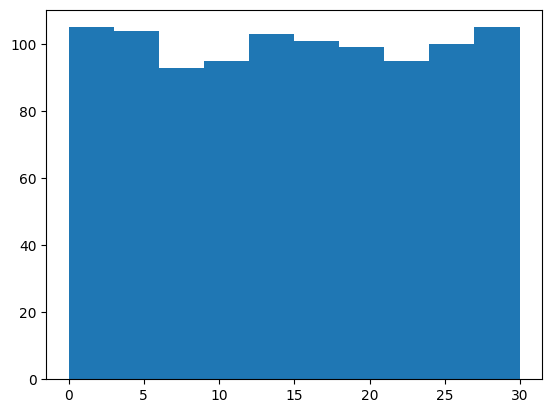

In [36]:
import matplotlib.pyplot as plt
plt.hist(wait_times)

## The binomial distribution
Probabilty distribution of the number of successes in a squence independent of trials
1. n -> total number of trials(size).
2. p -> probabilty of success.

The each trial must be indpendent

In [38]:
from scipy.stats import binom

In [43]:
## flip 1 conin 1 time
binom.rvs(1,0.5,size=1)

array([1])

In [42]:
## flip 1 coin 8 time
binom.rvs(1,0.5,size=8)

array([0, 0, 0, 1, 0, 0, 0, 0])

In [45]:
## flip 8 coin 1 time
binom.rvs(8,0.5,size=1)

array([4])

In [47]:
## flip 3 coin 10 times
binom.rvs(3,0.5,size=10)

array([2, 3, 3, 2, 1, 0, 1, 2, 2, 1])

In [48]:
## probablity of 7 heads in 10 trials
binom.pmf(7,10,0.5)

0.11718750000000004

In [54]:
## probabilty of 7 or fewer heads
binom.cdf(7,10,0.5)

0.9453125

In [55]:
## probabilty of more than 7 heads
1 - binom.cdf(7,10,0.5)

0.0546875

In [ ]:
## Expected value = n * p

